# Tutorial: Calculating the SDO/AIA Response Functions in SunPy
This notebook gives examples of how to calculate the SDO/AIA wavelength and temperature response functions using SunPy and ChiantiPy. The provided API is very simple and easy to use.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sunpy.instr.aia
%matplotlib inline

## Wavelength Response

Calculate the wavelength response functions with SunPy.

### EUV Channels: 94, 131, 171, 193, 211, 335, 304 $\mathrm{\mathring{A}}$

In [2]:
response = sunpy.instr.aia.Response(ssw_path='/Users/willbarnes/Documents/Rice/Research/ssw/')

In [3]:
response.calculate_wavelength_response()

Peek at the wavelength response functions.

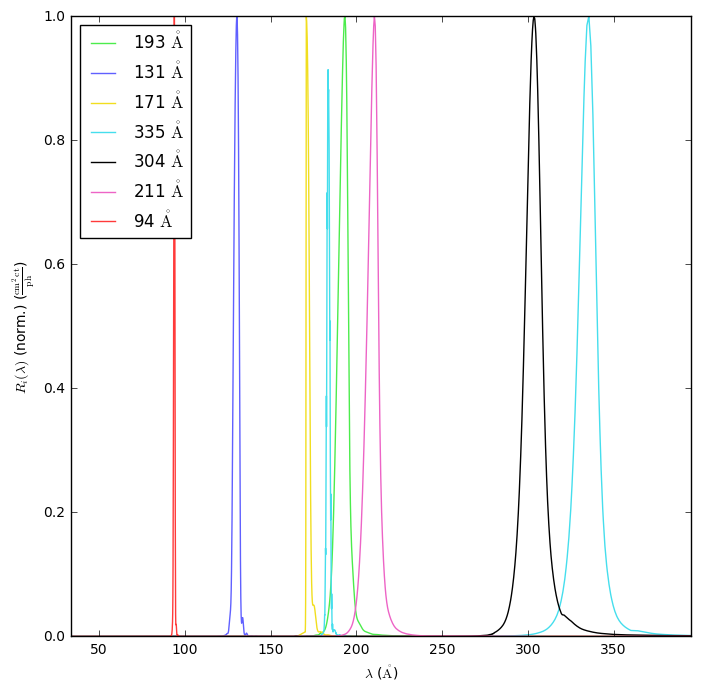

In [4]:
response.peek_wavelength_response()

### Far UV and Visible Channels: 1600, 1700, and 4500 $\mathrm{\mathring{A}}$

We can also very easily calculate the wavelength response functions for the far UV and visible channels centered on 1600, 1700, and 4500 $\mathrm{\mathring{A}}$.

In [5]:
response_uv = sunpy.instr.aia.Response(ssw_path='/Users/willbarnes/Documents/Rice/Research/ssw/',
                                       channel_list=[1600,1700,4500])

Cannot find contam for channel 1600 in file /Users/willbarnes/Documents/Rice/Research/ssw/sdo/aia/response/aia_V6_fuv_fullinst.genx
Setting ccd_contamination to 1
Cannot find contam for channel 1700 in file /Users/willbarnes/Documents/Rice/Research/ssw/sdo/aia/response/aia_V6_fuv_fullinst.genx
Setting ccd_contamination to 1
Cannot find contam for channel 4500 in file /Users/willbarnes/Documents/Rice/Research/ssw/sdo/aia/response/aia_V6_fuv_fullinst.genx
Setting ccd_contamination to 1


In [6]:
response_uv.calculate_wavelength_response()

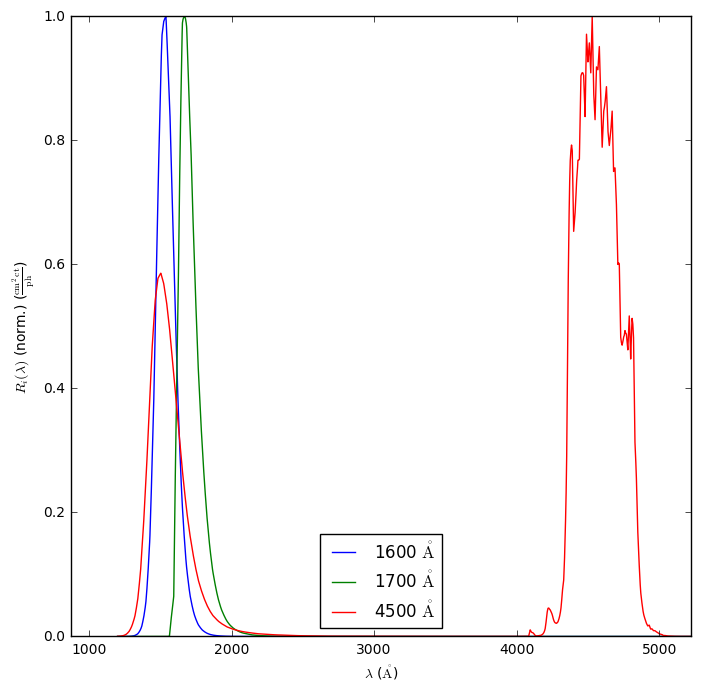

In [7]:
response_uv.peek_wavelength_response()

### Detailed Instrument Information
If you'd like _very_ detailed information about each channel on the instrument, you can also generate an astropy Table that lists all of the different instrument properties that go into the wavelength response calculation.
<div class="alert alert-danger" role="alert">
  <h1>Warning!</h1>
  <p>The following function is currently being used as a stop gap for pulling the instrument information about each channel out of the SSW .genx files. It is very likely that this functionality will change in the future.</p>
</div>

In [8]:
table=sunpy.instr.aia.aia_instr_properties_to_table([94,131,171,193,211,335,304,1600,1700,4500],
                            ['/Users/willbarnes/Documents/Rice/Research/ssw/sdo/aia/response/aia_V6_all_fullinst.genx',
                             '/Users/willbarnes/Documents/Rice/Research/ssw/sdo/aia/response/aia_V6_fuv_fullinst.genx'])

Cannot find contam for channel 1600 in file /Users/willbarnes/Documents/Rice/Research/ssw/sdo/aia/response/aia_V6_fuv_fullinst.genx
Setting ccd_contamination to 1
Cannot find contam for channel 1700 in file /Users/willbarnes/Documents/Rice/Research/ssw/sdo/aia/response/aia_V6_fuv_fullinst.genx
Setting ccd_contamination to 1
Cannot find contam for channel 4500 in file /Users/willbarnes/Documents/Rice/Research/ssw/sdo/aia/response/aia_V6_fuv_fullinst.genx
Setting ccd_contamination to 1


In [9]:
table

channel,wavelength,minimum_wavelength,wavelength_interval,number_wavelength_intervals,effective_area,geometric_area_ccd,plate_scale,electron_per_dn,electron_per_ev,focal_plane_filter_efficiency,entrance_filter_efficiency,primary_mirror_reflectance,secondary_mirror_reflectance,quantum_efficiency_ccd,ccd_contamination
Angstrom,Angstrom,Angstrom,Angstrom,,cm2,cm2,sr / pix,electron / ct,electron / eV,,,,,,
float64,object,float64,float64,int64,object,float64,float64,float64,float64,object,object,object,object,object,object
94.0,"[ 25. 25.10000038 25.20000076 ..., 899.79998779 899.90002441 900. ]",25.0,0.10000000149,8751,"[ 5.27489294e-12 5.14545784e-12 5.01929488e-12 ..., 2.45101570e-14 2.45180802e-14 2.45260016e-14]",83.0,8.46158039469e-12,18.2999992371,0.273972988129,"[ 5.17922007e-02 5.09420000e-02 5.01057990e-02 ..., 1.00001000e-06 1.00001000e-06 1.00001000e-06]","[ 5.17922007e-02 5.09420000e-02 5.01057990e-02 ..., 1.00001000e-06 1.00001000e-06 1.00001000e-06]","[ 5.36785637e-06 5.39225630e-06 5.41665577e-06 ..., 8.52360651e-02 8.52409825e-02 8.52458999e-02]","[ 5.36785637e-06 5.39225630e-06 5.41665577e-06 ..., 8.52360651e-02 8.52409825e-02 8.52458999e-02]","[ 0.85138208 0.8509894 0.85064727 ..., 0.09263941 0.09265867 0.09267791]","[ 0.96578515 0.96544755 0.96510959 ..., 0.43874961 0.43874961 0.43874961]"
131.0,"[ 25. 25.10000038 25.20000076 ..., 899.79998779 899.90002441 900. ]",25.0,0.10000000149,8751,"[ 1.89890617e-10 1.85231025e-10 1.80689325e-10 ..., 1.89969934e-13 1.90052726e-13 1.90135505e-13]",83.0,8.46158039469e-12,17.6000003815,0.273972988129,"[ 5.17922007e-02 5.09420000e-02 5.01057990e-02 ..., 1.00001000e-06 1.00001000e-06 1.00001000e-06]","[ 5.17922007e-02 5.09420000e-02 5.01057990e-02 ..., 1.00001000e-06 1.00001000e-06 1.00001000e-06]","[ 3.22066699e-05 3.23530621e-05 3.24994580e-05 ..., 2.37297297e-01 2.37324327e-01 2.37351358e-01]","[ 3.22066699e-05 3.23530621e-05 3.24994580e-05 ..., 2.37297297e-01 2.37324327e-01 2.37351358e-01]","[ 0.85138208 0.8509894 0.85064727 ..., 0.09263941 0.09265867 0.09267791]","[ 0.96578515 0.96544755 0.96510959 ..., 0.43874961 0.43874961 0.43874961]"
171.0,"[ 25. 25.10000038 25.20000076 ..., 899.79998779 899.90002441 900. ]",25.0,0.10000000149,8751,"[ 4.46234338e-08 4.47057964e-08 4.47890933e-08 ..., 2.74987561e-10 2.73075645e-10 2.71178691e-10]",83.0,8.46158039469e-12,17.7000007629,0.273972988129,"[ 5.95474005e-01 5.93567014e-01 5.91665983e-01 ..., 3.08021008e-05 3.06914008e-05 3.05811991e-05]","[ 5.95474005e-01 5.93567014e-01 5.91665983e-01 ..., 3.08021008e-05 3.06914008e-05 3.05811991e-05]","[ 4.29414904e-05 4.31366789e-05 4.33318710e-05 ..., 2.93110162e-01 2.93112487e-01 2.93114781e-01]","[ 4.29414904e-05 4.31366789e-05 4.33318710e-05 ..., 2.93110162e-01 2.93112487e-01 2.93114781e-01]","[ 0.85138208 0.8509894 0.85064727 ..., 0.09263941 0.09265867 0.09267791]","[ 0.96578515 0.96544755 0.96510959 ..., 0.43874961 0.43874961 0.43874961]"
193.0,"[ 25. 25.10000038 25.20000076 ..., 899.79998779 899.90002441 900. ]",25.0,0.10000000149,8751,"[ 0.00000000e+00 0.00000000e+00 0.00000000e+00 ..., 3.31152911e-10 3.28830518e-10 3.26526500e-10]",83.0,8.46158039469e-12,18.2999992371,0.273972988129,"[ 5.95474005e-01 5.93567014e-01 5.91665983e-01 ..., 3.08021008e-05 3.06914008e-05 3.05811991e-05]","[ 5.95474005e-01 5.93567014e-01 5.91665983e-01 ..., 3.08021008e-05 3.06914008e-05 3.05811991e-05]","[ 0. 0. 0. ..., 0.32165378 0.32164654 0.32163933]","[ 0. 0. 0. ..., 0.32165378 0.32164654 0.32163933]","[ 0.85138208 0.8509894 0.85064727 ..., 0.09263941 0.09265867 0.09267791]","[ 0.96578515 0.96544755 0.96510959 ..., 0.43874961 0.43874961 0.43874961]"
211.0,"[ 25. 25.10000038 25.20000076 ..., 899.79998779 899.90002441 900. ]",25.0,0.10000000149,8751,"[ 2.78900547e-09 2.79415358e-09 2.79935963e-09 ..., 2.51502985e-10 2.49762072e-10 2.48034815e-10]",83.0,8.46158039469e-12,18.2999992371,0.273972988129,"[ 5.95474005e-01 5.93567014e-01 5.91665983e-01 ..., 3.08021008e-05 3.06914008e-05 3.05811991e-05]","[ 5.9547

## Temperature Response